In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler

In [3]:
ds=pd.read_csv('salary project.csv')
df=pd.DataFrame(ds)
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [4]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [5]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

# Apply encoder

In [6]:
la=LabelEncoder()

In [7]:
list1=['rank','discipline','sex']
for i in list1:
    df[i]=la.fit_transform(df[i])

In [8]:
df.dtypes

rank             int32
discipline       int32
yrs.since.phd    int64
yrs.service      int64
sex              int32
salary           int64
dtype: object

In [9]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


# Summary of statistic

In [10]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


<AxesSubplot:>

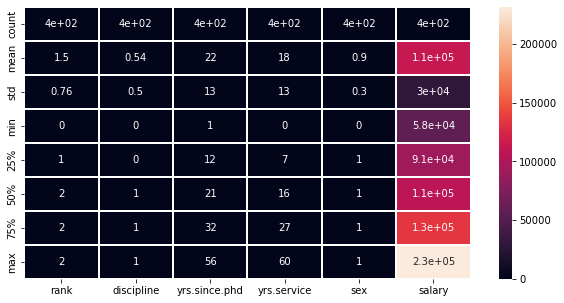

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(df.describe(),annot=True,linewidth=2)

# UNI_VARIENT ANALYSIS

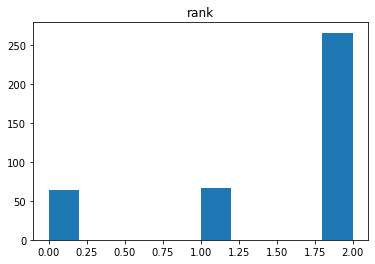

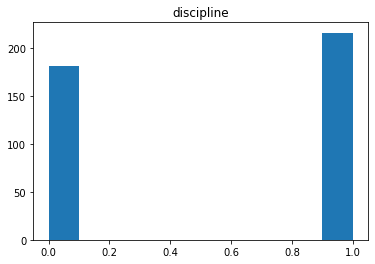

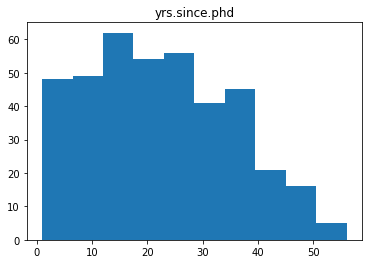

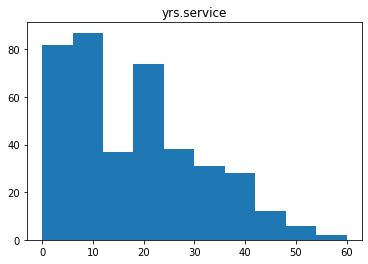

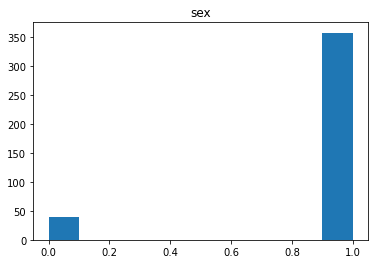

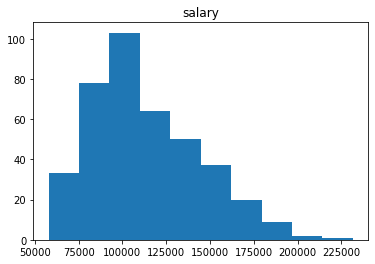

In [12]:
for i in ds.columns:
    plt.figure()
    plt.title(i)
    plt.hist(df[i])

In [13]:
col=df.columns
nrows=15
ncol=30
len(col)

6

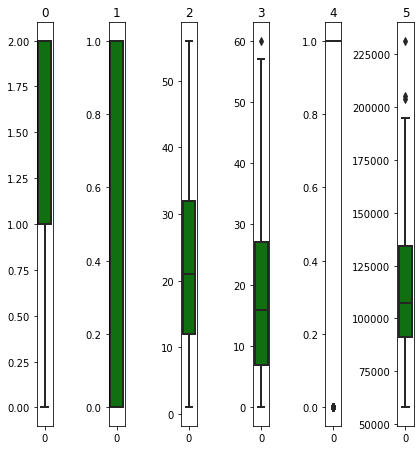

In [14]:
plt.figure(figsize=(ncol,3*ncol))
for i in range(len(col)):
    plt.subplot(nrows,ncol,i+1)
    plt.title(i)
    sns.boxplot(data=df[col[i]],color='green',linewidth=2)
    plt.tight_layout()

# TO BE CHECK CORRELATION

In [15]:
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


<AxesSubplot:>

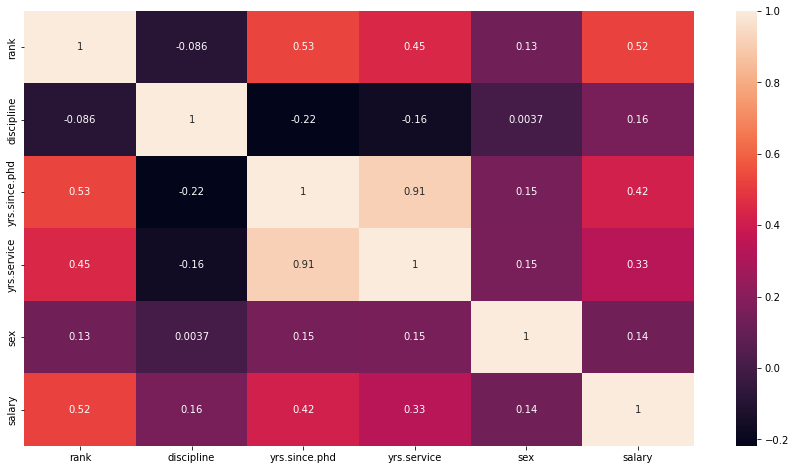

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

# BI_VARIENT ANALYSIS

In [17]:
a=df.drop('salary',axis=1)
b=df.salary

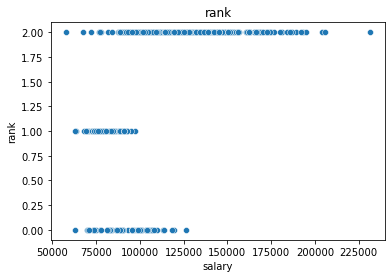

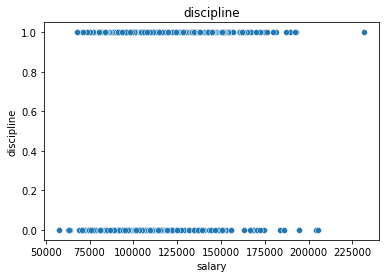

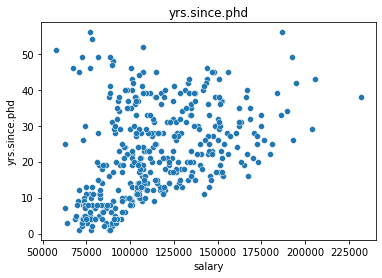

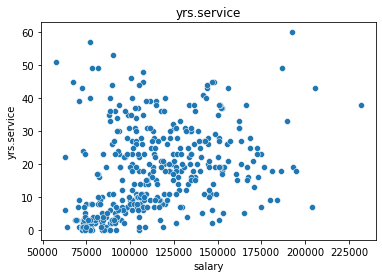

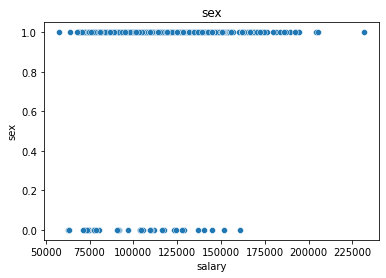

In [18]:
for i in a.columns:
    plt.figure()
    plt.title(i)
    sns.scatterplot(x=b,y=df[i])

# REMOVING OUTLIERS

In [19]:
from scipy.stats import zscore

In [20]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
        103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
        230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
        341, 358, 361, 364], dtype=int64),
 array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
       dtype=int64))

In [21]:
df_new=df[(z<3).all(axis=1)]
df_new

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


In [22]:
df.shape

(397, 6)

In [23]:
df_new.shape

(354, 6)

In [24]:
Data_loss=((397-354)/397)*100
Data_loss

10.831234256926953

AS we see that the loss value is too high so we not take data from ds_new and no outliers is only in target value but we not touch 

# Remove skewness 

In [25]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

In [26]:
ds=df.drop('yrs.service',axis=1)

In [27]:
ds.dtypes

rank             int32
discipline       int32
yrs.since.phd    int64
sex              int32
salary           int64
dtype: object

In [28]:
from sklearn.preprocessing import power_transform

In [29]:
s=ds.drop('salary',axis=1)
x=power_transform(s,method='yeo-johnson')
x

array([[ 0.69005113,  0.91540317, -0.12729454,  0.3300584 ],
       [ 0.69005113,  0.91540317, -0.04917821,  0.3300584 ],
       [-1.09153554,  0.91540317, -1.62812069,  0.3300584 ],
       ...,
       [ 0.69005113, -1.09241483,  1.39552477,  0.3300584 ],
       [ 0.69005113, -1.09241483,  0.32017198,  0.3300584 ],
       [-1.09153554, -1.09241483, -1.13497737,  0.3300584 ]])

In [30]:
st=StandardScaler()
x=st.fit_transform(x)
x

array([[ 0.69005113,  0.91540317, -0.12729454,  0.3300584 ],
       [ 0.69005113,  0.91540317, -0.04917821,  0.3300584 ],
       [-1.09153554,  0.91540317, -1.62812069,  0.3300584 ],
       ...,
       [ 0.69005113, -1.09241483,  1.39552477,  0.3300584 ],
       [ 0.69005113, -1.09241483,  0.32017198,  0.3300584 ],
       [-1.09153554, -1.09241483, -1.13497737,  0.3300584 ]])

In [31]:
y=ds.salary

In [32]:
x.shape


(397, 4)

# Now we apply diffrent model to find that which is best

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [34]:
li=LinearRegression()

In [35]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    li.fit(x_train,y_train)
    pred_train=li.predict(x_train)
    pred_test=li.predict(x_test)
    print(f"At random state {i},the training accuracy is :{r2_score(y_train,pred_train)}")
    print(f'aT random state {i},the testing accuracy is:{r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is :0.39854803047885967
aT random state 0,the testing accuracy is:0.4544049678920856


At random state 1,the training accuracy is :0.40036816066577297
aT random state 1,the testing accuracy is:0.4534699839526318


At random state 2,the training accuracy is :0.41210497019033265
aT random state 2,the testing accuracy is:0.4089368617231841


At random state 3,the training accuracy is :0.43040389942018586
aT random state 3,the testing accuracy is:0.3445466685099533


At random state 4,the training accuracy is :0.4252396825563858
aT random state 4,the testing accuracy is:0.3384564415389214


At random state 5,the training accuracy is :0.4276507011616195
aT random state 5,the testing accuracy is:0.3364277522335196


At random state 6,the training accuracy is :0.3979321183469823
aT random state 6,the testing accuracy is:0.47380317239434533


At random state 7,the training accuracy is :0.3921873218066
aT random state 7,the testing accuracy is:0.498886585

At random state 76,the training accuracy is :0.43165382349647896
aT random state 76,the testing accuracy is:0.2722086962236886


At random state 77,the training accuracy is :0.4003476624711729
aT random state 77,the testing accuracy is:0.42903460775640645


At random state 78,the training accuracy is :0.42249866117947354
aT random state 78,the testing accuracy is:0.3647481030001678


At random state 79,the training accuracy is :0.38448546365355496
aT random state 79,the testing accuracy is:0.5260152501047866


At random state 80,the training accuracy is :0.38880006643190756
aT random state 80,the testing accuracy is:0.5407557236936091


At random state 81,the training accuracy is :0.39239187702618783
aT random state 81,the testing accuracy is:0.4633382316528326


At random state 82,the training accuracy is :0.41016124526852993
aT random state 82,the testing accuracy is:0.41023228116050503


At random state 83,the training accuracy is :0.4066653837511971
aT random state 83,the testing a

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=82)
li.fit(x_train,y_train)
pred_test=li.predict(x_test)
print(f'r2_score is:{r2_score(y_test,pred_test)}')
print(f'Score is:{li.score(x_train,y_train)}')

r2_score is:0.41023228116050503
Score is:0.41016124526852993


# CROSS-VALIDATION OF THE MODEL

In [37]:
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(li,x,y,cv=j)
    cv_mean=cv_score.mean()
    cv_std=cv_score.std()
    print(f'At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and accuracy score for testing is {test_accuracy}')
    print('\n')

At cross fold 2 the cv score is 0.399507782033976 and accuracy score for training is -0.36672930967557904 and accuracy score for testing is 0.41023228116050503


At cross fold 3 the cv score is 0.36912982480570605 and accuracy score for training is -0.36672930967557904 and accuracy score for testing is 0.41023228116050503


At cross fold 4 the cv score is 0.3901442428283225 and accuracy score for training is -0.36672930967557904 and accuracy score for testing is 0.41023228116050503


At cross fold 5 the cv score is 0.37526292854885296 and accuracy score for training is -0.36672930967557904 and accuracy score for testing is 0.41023228116050503


At cross fold 6 the cv score is 0.3843226418696622 and accuracy score for training is -0.36672930967557904 and accuracy score for testing is 0.41023228116050503


At cross fold 7 the cv score is 0.3779134160433642 and accuracy score for training is -0.36672930967557904 and accuracy score for testing is 0.41023228116050503


At cross fold 8 the c

Here we have handle the problem of the oveerfitting and underfitting by checking the training and testing score

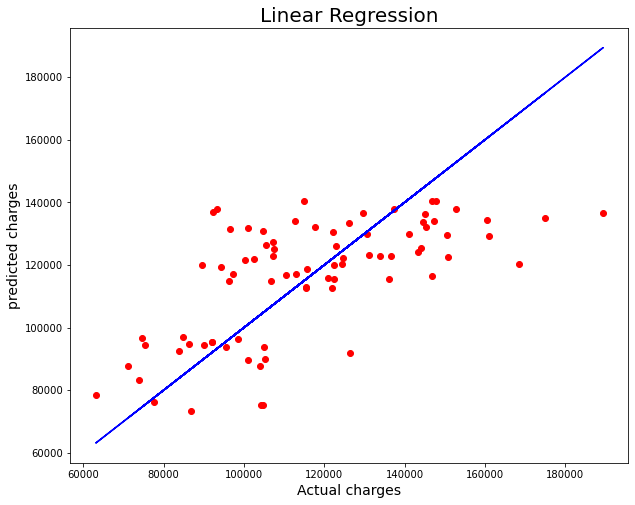

In [38]:
plt.figure(figsize=(10,8))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')

plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('predicted charges',fontsize=14)
plt.title('Linear Regression',fontsize=20)
plt.savefig('li.png')
plt.show()

# Regularization

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
dict1={'alpha':[0.001,0.001,0.01,0.1,1],'random_state':list(range(0,10))}

In [41]:
from sklearn.linear_model import Lasso
model=Lasso()

In [42]:
gd=GridSearchCV(estimator=model,param_grid=dict1)

In [43]:
gd.fit(x,y)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.001, 0.01, 0.1, 1],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [44]:
gd.best_params_

{'alpha': 1, 'random_state': 0}

In [45]:
gd.best_score_

0.37526356252604653

In [46]:
ls=Lasso(alpha=0.0001,random_state=0)  
ls.fit(x,y)
print(ls.score(x_train,y_train))
pred_ls=ls.predict(x_test)

0.40980030886217866


in best_params_ give alpha=1 at 0.40977 but insted of alpha=0.0001 give 0.409800 so we take alpha=0.0001

# Ensemble technique

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
parameter={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameter)
clf.fit(x,y)
clf.best_params_

{'criterion': 'mae', 'max_features': 'sqrt'}

In [49]:
rf=RandomForestRegressor(criterion='mae',max_features='log2')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_rf=rf.predict(x_test)
print('R2 score:',r2_score(y_test,pred_rf))

rfscore=cross_val_score(rf,x,y,cv=2)
print('cross val score:',rfscore.mean())

R2 score: 0.14838629159091354
cross val score: 0.31711981393579214


# Conclusion= We get maximun score is 41%